## Exercise 4.8 Building your own digit recognition model

Now, you are going to apply your knowledge to a new model and different dataset.

This is the MNIST dataset, which contains images of handwritten digits. Each image is composed of a 28 pixel by 28 pixel grid, each pixel in an image has gray-scale value. So, 0 would be as light as possible, and 255 is as dark as possible.

For each image, the 28 x 28 grid has been flattened into a 784 x 1 array, showing a digit like 0, 1, 2, 3 4, all the way up to 9. You can download the dataset from the following link:

[mnist.csv](https://drive.google.com/file/d/1Z2N5ad_hsdguG64ta76O8iTKiBnPwxZK/view?usp=sharing)

You will create a deep learning model taking in those 784 features for each image as inputs, and predicting digits from among 10 possible values for the output.

The data is pre-loaded into a pandas DataFrame called `df`. The dataframe has 2000 rows, we will divide `df` into two parts. The first 1900 rows are used to create the `predictors` for training the model. Other 100 rows are used to create the `pred_data` for making predictions with the model.

The `predictors`, `target`, and `pred_data` arrays are also pre-defined.

We also define an utility function named `showImg()` to show images from the dataset with the corresponding labels.


## Instructions

* Create a model that has two hidden layers of `50` units. The input_shape for this dataset is `(784,)`. The activation function of the hidden layers are `'relu'`.
* The output layer should use `'softmax'` activation function, and the number of nodes in this layer should be the same as the number of possible outputs, in this case: `10`.
* Compile model as you have done with previous exercise: Using `'adam'` as the optimizer, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
* Fit the model using `predictors` and `target`, using a `validation_split` of `0.3`. The number of epochs is `20`, using early stopping with `patience=5`.
* After finish fitting the model, you should save the model with `model.save()` function.
* Load the saved model with `load_model()` function, then use the loaded model to predict on `pred_data`.

## Code

Load data and convert the data to NumPy array:

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Load csv file into the dataframe: df
df = pd.read_csv("mnist.csv")

# The dataframe df has 2000 rows, we will divide df into two parts
# The first 1900 rows are used to create the predictors for training the model
# Other 100 rows are used to create the pred_data for making predictions with the model
trainDF = df.iloc[:1900,:]
predictDF = df.iloc[1900:,:]
print(f"The shape of: df = {df.shape}, trainDF = {trainDF.shape}, predictDF = {predictDF.shape}")

# Create predictors NumPy array: predictors
predictors = trainDF.drop(['5'], axis=1).values

# Create list of image labels
label = trainDF['5'].values

# Convert the target to categorical: target
target = to_categorical(trainDF['5'])

# Create data for predictions NumPy array: pred_data
pred_data = predictDF.drop(['5'], axis=1).values

print(f"The shape of: predictors = {predictors.shape}, target = {target.shape}, pred_data = {pred_data.shape}")

# Define the input shape: input_shape
n_cols = predictors.shape[1]
input_shape = (n_cols,)


The shape of: df = (2000, 785), trainDF = (1900, 785), predictDF = (100, 785)
The shape of: predictors = (1900, 784), target = (1900, 10), pred_data = (100, 784)


Define utility functions

<Figure size 640x480 with 0 Axes>

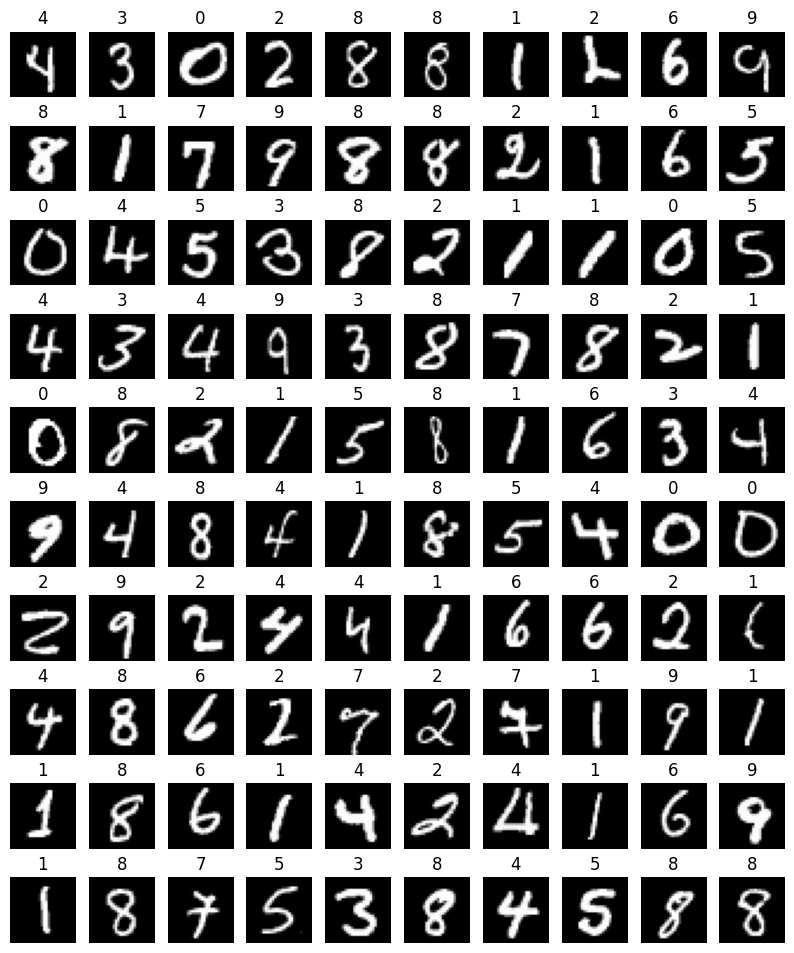

In [2]:
import matplotlib.pyplot as plt
plt.gray()

# Function showImage display images in a grid of nRow x nColumn
# Image data comes from the data array, starting from startIndex
# label array contains the corresponding lable of the image
def showImage(nRow, nColumn, startIndex, data, label):
#  imgData =[]
  # create figure
  fig = plt.figure(figsize=(nColumn, nRow*1.2))

  # reading images
  for i in range(0, nRow*nColumn):
    row = data[startIndex + i]
    title = label[startIndex + i]
    imgData = row.reshape([28,28])

    # Adds a subplot at the i+1 position
    fig.add_subplot(nRow, nColumn, i+1)
    plt.imshow(imgData)
    plt.axis('off')
    plt.title(title)

  plt.show()

# Show 100 images in the predictors array, starting from #0
showImage(10, 10, 0, predictors, label)


Create a neural network for the classification task

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define a function to create model:
def get_new_model(input_shape):
  # Set up the model
  model = Sequential()
  model.add(Dense(50, activation='relu', input_shape=input_shape))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model


Compile and fit the model with a validation dataset:

In [4]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Specify, compile and fit the model
model = get_new_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=5)
model_training = model.fit(predictors, target, epochs=20, validation_split=0.3, callbacks=[early_stopping_monitor])

# Save the model - creates a zip archive myModel.keras.
model.save('myModel.keras')

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3060 - loss: 30.4252 - val_accuracy: 0.5912 - val_loss: 7.9033
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7339 - loss: 4.0714 - val_accuracy: 0.6579 - val_loss: 5.3378
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7988 - loss: 2.0806 - val_accuracy: 0.6930 - val_loss: 4.2418
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8648 - loss: 1.2519 - val_accuracy: 0.7193 - val_loss: 4.1223
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9029 - loss: 0.6509 - val_accuracy: 0.7351 - val_loss: 3.7807
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9203 - loss: 0.5168 - val_accuracy: 0.7544 - val_loss: 3.5065
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9551 - loss: 0.2645 - val_accuracy: 0.7439 - val_loss: 3.7530
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9739 - loss: 0.1263 - val_accuracy: 0.7614 - val_loss: 3.2979
E

Load the saved model and make predictions on the `pred_data`

In [5]:
# Import load_model
from tensorflow.keras.models import load_model

myModel = load_model('myModel.keras')
predictions = myModel.predict(pred_data)
prediction_classes = np.argmax(predictions,axis=1)
print(prediction_classes)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[8 2 8 9 5 7 0 4 1 8 6 9 4 5 3 7 1 0 6 0 2 3 9 4 6 0 1 2 1 9 4 2 7 0 1 6 0
 9 7 5 7 1 1 8 9 5 8 1 9 9 8 6 2 2 6 4 7 6 2 6 4 7 7 2 9 7 5 8 8 3 4 4 1 3
 7 7 7 0 7 7 8 1 3 0 0 7 8 1 1 9 4 9 0 0 9 3 3 8 9 9]


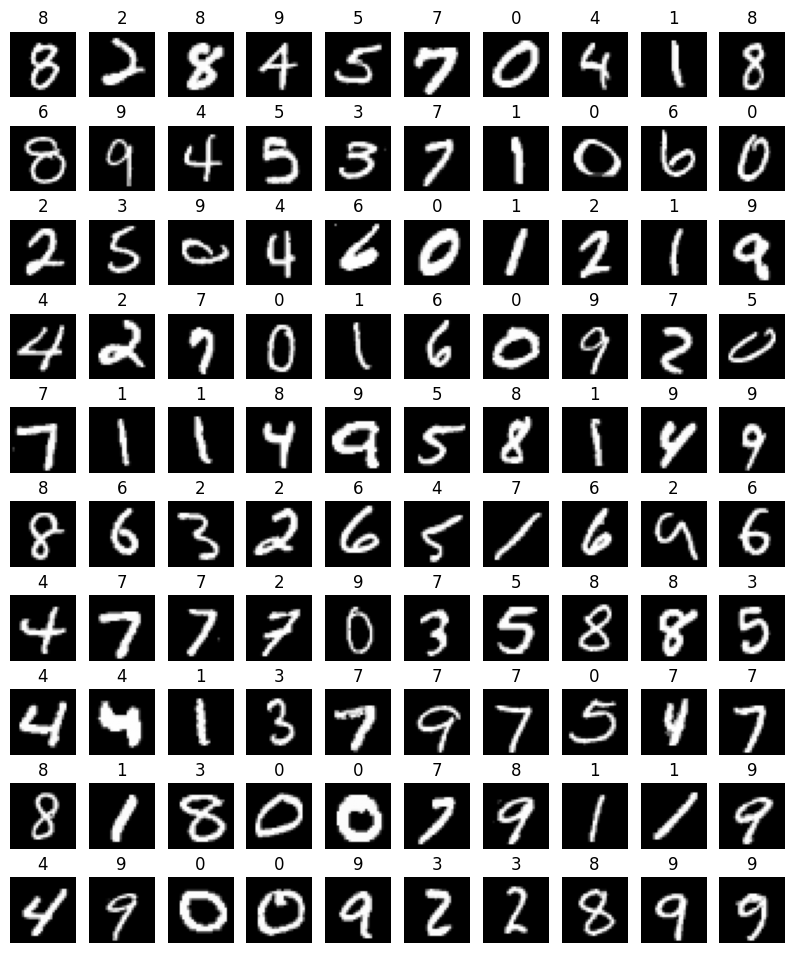

In [6]:
# Show 100 images in the pred_data array with prediction result, starting from #0
showImage(10, 10, 0, pred_data, prediction_classes)

# Question
The current model has the `val_accuracy` around `0.77`. Please improve the model to get the `val_accuracy` more than `0.8`.
Use the new model to predict on the `pred_data` and compare the results.

In [7]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define a function to create model:
def get_new_model(input_shape):
    # Set up the model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=input_shape))  # Hidden layer 1 (50 units)
    model.add(Dense(50, activation='relu'))                          # Hidden layer 2 (50 units)
    model.add(Dense(10, activation='softmax'))                       # Output layer (10 classes)
    return model

Kích thước tập train: (60000, 28, 28) (60000,)
Kích thước tập test : (10000, 28, 28) (10000,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
375/375 - 4s - 11ms/step - accuracy: 0.8935 - loss: 0.3719 - val_accuracy: 0.9473 - val_loss: 0.1764
Epoch 2/20
375/375 - 4s - 11ms/step - accuracy: 0.9565 - loss: 0.1491 - val_accuracy: 0.9628 - val_loss: 0.1323
Epoch 3/20
375/375 - 2s - 5ms/step - accuracy: 0.9692 - loss: 0.1031 - val_accuracy: 0.9683 - val_loss: 0.1083
Epoch 4/20
375/375 - 2s - 5ms/step - accuracy: 0.9770 - loss: 0.0765 - val_accuracy: 0.9714 - val_loss: 0.0976
Epoch 5/20
375/375 - 2s - 5ms/step - accuracy: 0.9817 - loss: 0.0599 - val_accuracy: 0.9708 - val_loss: 0.0990
Epoch 6/20
375/375 - 3s - 9ms/step - accuracy: 0.9850 - loss: 0.0485 - val_accuracy: 0.9737 - val_loss: 0.0904
Epoch 7/20
375/375 - 4s - 11ms/step - accuracy: 0.9880 - loss: 0.0399 - val_accuracy: 0.9678 - val_loss: 0.1138
Epoch 8/20
375/375 - 2s - 5ms/step - accuracy: 0.9893 - loss: 0.0343 - val_accuracy: 0.9733 - val_loss: 0.0946
Epoch 9/20
375/375 - 4s - 11ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.9707 - val_loss: 0.10

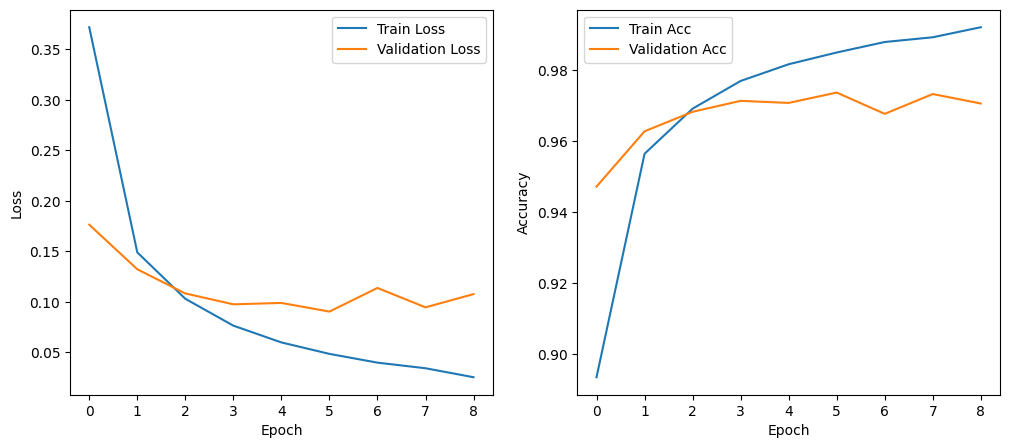

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Nhãn thực tế   : [7 2 1 0 4]
Nhãn dự đoán   : [7 2 1 0 4]


In [8]:
# Import thư viện
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Kích thước tập train:", x_train.shape, y_train.shape)
print("Kích thước tập test :", x_test.shape, y_test.shape)

# 2. Chuẩn hóa dữ liệu
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. One-hot encoding cho nhãn
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 4. Xây dựng mô hình mạng nơ-ron
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))       # Biến 28x28 thành vector
model.add(Dense(128, activation='relu'))       # Hidden layer 1
model.add(Dense(64, activation='relu'))        # Hidden layer 2
model.add(Dense(10, activation='softmax'))     # Output layer (10 class)

# 5. Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Early stopping để tránh overfitting
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# 7. Huấn luyện mô hình
history = model.fit(x_train, y_train_cat,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=128,
                    callbacks=[early_stop],
                    verbose=2)

# 8. Đánh giá mô hình trên test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Độ chính xác trên tập test: {test_acc:.4f}")

# 9. Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 10. Dự đoán thử một số mẫu ảnh
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

print("Nhãn thực tế   :", y_test[:5])
print("Nhãn dự đoán   :", predicted_labels)